In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# source the nxcals python libs
from nxcals.api.extraction.data.builders import *
from datetime import datetime
from datetime import timedelta
import pickle
from matplotlib import gridspec
import seaborn as sns
import pickle
from cpymad.madx import Madx
from pybt.tools.plotters import *
from madxtools.plot_tool import *
from madxtools.air_scattering import *
import requests

def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 14
    mpl.rcParams['axes.titlesize'] = 20  # Change the number for your preferred fontsize
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

In [11]:
with open('Quadrupoles_dispersion_run.pickle', 'rb') as f:
    df_quadrupoles = pickle.load(f)

In [12]:
E_cin_per_nucleon = 2.0
# Ion properties
A = 208.0
Z = 82.0
N = 126.0
charge = 54.0
m_proton_GeV = 0.93828
m_neutron_GeV = 0.93957
m_electron_GeV = 0.000511
m_u_GeV = 0.9315
mass_defect_GeV = Z * m_proton_GeV + N * m_neutron_GeV + (Z - charge) * m_electron_GeV - A * m_u_GeV
E_0 = Z * m_proton_GeV + N * m_neutron_GeV - mass_defect_GeV

p = E_0 * np.sqrt((((E_cin_per_nucleon * A) / E_0) + 1) ** 2 - 1)

gamma = p/charge/0.938
beta = np.sqrt(1-gamma**(-2))
exn=1.5e-6
eyn=1.5e-6
ex = exn/(beta*gamma)
ey = eyn/(beta*gamma)

print(p/charge)
print(f"gamma = {round(gamma,3)}")
print(f"beta = {round(beta,3)}")
print(f"p = {round(p/charge,3)} GeV/c")

Brho = 3.33564*p/charge

10.706294697042374
gamma = 11.414
beta = 0.996
p = 10.706 GeV/c


In [13]:
selector = "CPS.USER.MD3"
target_timestamp = pd.to_datetime('2023-10-31 18:45:00.00')

keys = ["F61.QFN007/MEAS.PULSE",
           "F61.QDN014/MEAS.PULSE",
           "F61.QFN021/MEAS.PULSE",
           "F61.QDN030/MEAS.PULSE",
           "T08.QFN021/MEAS.PULSE",
           "T08.QDN023/MEAS.PULSE",
           "T08.QDN061/MEAS.PULSE",
           "T08.QFN066/MEAS.PULSE"]

quad_k1_at_targ_t = []
for key in keys:
    print(key)
    df_quadrupoles_key = df_quadrupoles[df_quadrupoles.magnet_name == key]

    differences = (df_quadrupoles_key[df_quadrupoles_key.selector == selector].timestamp - target_timestamp).abs()
    closest_index = differences.idxmin()
    element = closest_index

    print(df_quadrupoles_key.magnet_name.loc[element])
    print(df_quadrupoles_key.timestamp.loc[element])
    print(df_quadrupoles_key.k1.loc[element])
    quad_k1_at_targ_t.append(df_quadrupoles_key.k1.loc[element])
    print("")
print(quad_k1_at_targ_t)

F61.QFN007/MEAS.PULSE
F61.QFN007/MEAS.PULSE
2023-10-28 19:59:15.098238525
0.4795769695381157

F61.QDN014/MEAS.PULSE
F61.QDN014/MEAS.PULSE
2023-10-28 19:59:15.098238525
0.2099947499913021

F61.QFN021/MEAS.PULSE
F61.QFN021/MEAS.PULSE
2023-10-28 19:59:15.098238525
0.19863661203739902

F61.QDN030/MEAS.PULSE
F61.QDN030/MEAS.PULSE
2023-10-28 19:59:15.098238525
0.09034022218415182

T08.QFN021/MEAS.PULSE
T08.QFN021/MEAS.PULSE
2023-10-28 19:59:15.098238525
0.19595168738155916

T08.QDN023/MEAS.PULSE
T08.QDN023/MEAS.PULSE
2023-10-28 19:59:15.098238525
0.19441989147895122

T08.QDN061/MEAS.PULSE
T08.QDN061/MEAS.PULSE
2023-10-28 19:59:15.098238525
0.06140717475213103

T08.QFN066/MEAS.PULSE
T08.QFN066/MEAS.PULSE
2023-10-28 19:59:15.098238525
0.06553821926527045

[0.4795769695381157, 0.2099947499913021, 0.19863661203739902, 0.09034022218415182, 0.19595168738155916, 0.19441989147895122, 0.06140717475213103, 0.06553821926527045]


/Users/eliottjohnson/git_repos/venv3_9/lib/python3.9/site-packages/madxtools/plot_tool.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.set_xlim(0,twiss.s[-1])
/Users/eliottjohnson/git_repos/venv3_9/lib/python3.9/site-packages/madxtools/plot_tool.py:168: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].set_xlim(0,twiss.s[-1])
/Users/eliottjohnson/git_repos/venv3_9/lib/python3.9/site-packages/madxtools/plot_tool.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

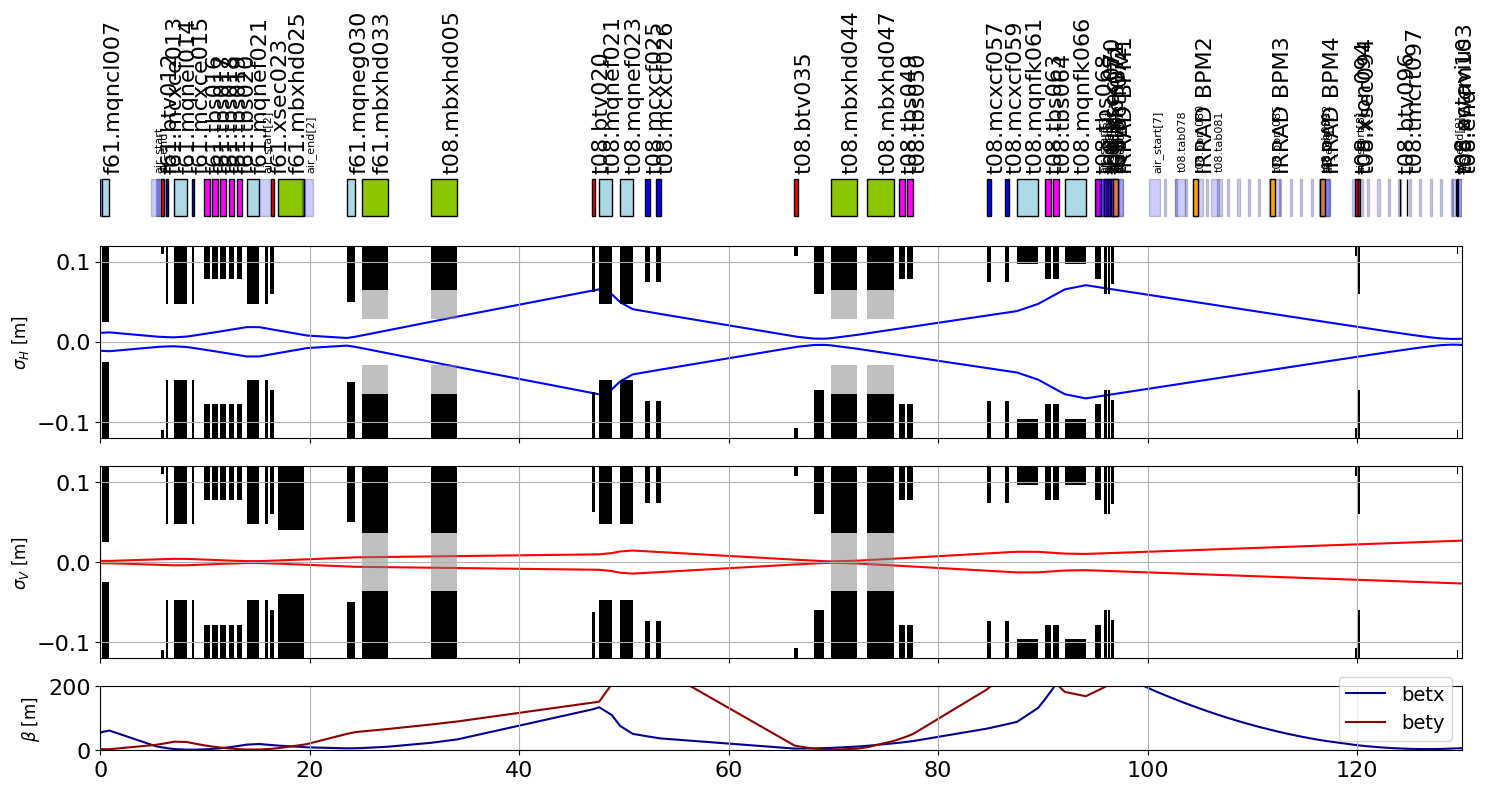

In [62]:
# Matched initial parameters 13nd oct 2023
betx0 = 53.074
alfx0 = -13.191
Dx0 = 0.11
Dpx0 = 0.2
exn = 2.53e-5

bety0 = 3.675
alfy0 = 0.859
Dy0 = 0.0
Dpy0 = 0.0
eyn = 6.94e-06

sige = 0.0045

ex = exn/(beta*gamma)
ex_initial = ex
ey = eyn/(beta*gamma)
ey_initial = ey

with open('tempfile', 'w') as f:
    madx = Madx(stdout=f,stderr=f)
    madx.option(verbose=True, debug=False, echo=True, warn=True, twiss_print=False)

madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.str").text)
madx.input(requests.get("https://gitlab.cern.ch/eljohnso/acc-models-tls-eliott-fork/-/raw/EliottBranch/ps_extraction/f61t8/f61t8_op.seq").text)

# Quadrupoles
madx.input("kQFN1 = "+str(quad_k1_at_targ_t[0])+";")
madx.input("kQDN2 = "+str(-quad_k1_at_targ_t[1])+";")
madx.input("kQFN3 = "+str(quad_k1_at_targ_t[2])+";")
madx.input("kQDN4 = "+str(-quad_k1_at_targ_t[3])+";")
madx.input("kQFN5 = "+str(quad_k1_at_targ_t[4])+";")
madx.input("kQDN6 = "+str(-quad_k1_at_targ_t[5])+";")
madx.input("kQDN7 = "+str(-quad_k1_at_targ_t[6])+";")
madx.input("kQFN8 = "+str(quad_k1_at_targ_t[7])+";")

# Dipoles
madx.input("kBHZ1 = "+str(-0.04821227494)+";")
madx.input("kBHZ2 = "+str(0.04980753404)+";")
madx.input("kBHZ3 = "+str(0.02555487086)+";")
madx.input("kBHZ4 = "+str(-0.03515967369)+";")
madx.input("kBHZ5 = "+str(-0.03515967369)+";")

# Add the Air region
sequence = "f61t8_op"

p1 = madx.sequence['f61t8_op'].elements["f61.btv012"].position - 0.5 # This dimension needs to be checked
p2 = madx.sequence['f61t8_op'].elements["f61.btv012"].position
add_air_region(madx, "1", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["f61.bctf022"].position
p2 = madx.sequence['f61t8_op'].elements["f61.mbxhd025"].position + madx.sequence['f61t8_op'].elements["f61.mbxhd025"].length + 0.3
add_air_region(madx, "2", sequence, p1, p2, p2-p1-0.3)

#t08.tbs068, t08.xsec070, t08.xion071, t08.bctf072, t08.bpm073
p1 = madx.sequence['f61t8_op'].elements["t08.tbs068"].position + madx.sequence['f61t8_op'].elements["t08.tbs068"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position
add_air_region(madx, "3", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xsec070"].position + madx.sequence['f61t8_op'].elements["t08.xsec070"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.xion071"].position
add_air_region(madx, "4", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.xion071"].position + madx.sequence['f61t8_op'].elements["t08.xion071"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position
add_air_region(madx, "5", sequence, p1, p2, (p2-p1)/2)

p1 = madx.sequence['f61t8_op'].elements["t08.bctf072"].position + madx.sequence['f61t8_op'].elements["t08.bctf072"].length 
p2 = madx.sequence['f61t8_op'].elements["t08.bpm073"].position
add_air_region(madx, "6", sequence, p1, p2, (p2-p1)/2)

pos_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].position
len_t08_vac_chamber75 = madx.sequence['f61t8_op'].elements["T08.VACCUM_CHAMBER75"].length
pos_t08_bpm092 = madx.sequence['f61t8_op'].elements["T08.BPM092"].position
add_air_region(madx, "7", sequence, pos_t08_vac_chamber75 + len_t08_vac_chamber75, pos_t08_bpm092, 1)

pos_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].position
len_t08_xion094 = madx.sequence['f61t8_op'].elements["T08.xion094"].length
pos_t08_mwpc = madx.sequence['f61t8_op'].elements["T08.xwcm103"].position
add_air_region(madx, "8", sequence, pos_t08_xion094 + len_t08_xion094, pos_t08_mwpc, 1)


# add_hidden_marker(madx, sequence, 20, 100, steps)

madx.command.beam(particle='PROTON',pc=p/charge,exn=exn,eyn=eyn)
madx.input('BRHO      := BEAM->PC * 3.3356;')
madx.input('SELECT, FLAG=TWISS, COLUMN=NAME,KEYWORD,S,L,K1L,BETX,ALFX,X,DX,PX,DPX,MUX,BETY,ALFY,Y,DY,PY,DPY,MUY,APERTYPE,APER_1,APER_2,APER_3,APER_4,KMIN,RE11,RE12,RE21,RE22,RE33,RE34,RE43,RE44,RE16,RE26;')
madx.use(sequence=sequence)

madx.input('''
SEQEDIT, sequence=f61t8_op;
SELECT, FLAG = SEQEDIT, PATTERN = ".*VACC.*";
REMOVE, ELEMENT=SELECTED;
ENDEDIT;
''')

# make thin
madx.use(sequence="f61t8_op")
madx.input('SEQEDIT, sequence=f61t8_op;')
madx.input('FLATTEN;')
madx.input('ENDEDIT;')
madx.use(sequence="f61t8_op")
madx.input("SELECT, FLAG=makethin, CLASS=dipole, SLICE=3;")
# madx.input("MAKETHIN, SEQUENCE=f61t8_op, style=TEAPOT")
madx.use(sequence="f61t8_op")



twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()

plot_graph(twiss, ex, sige, ey, fontsize=12, figsize=(15,8), height_ratios=[1,3,3,1])

In [63]:
madx.use(sequence=sequence)
madx.input(f"SAVEBETA, LABEL=savebeta_air, PlACE = AIR_START, SEQUENCE={sequence};")
twiss = madx.twiss(betx=betx0, bety=bety0, alfx=alfx0, alfy=alfy0, Dx=Dx0, Dy=Dy0, Dpx=Dpx0, Dpy=Dpy0).dframe()
twiss, twiss_scattered = process_scattering(madx, exn, eyn, beta, gamma, sequence, "t08.end", p/charge, twiss, ex_initial, ey_initial)

(-1.2, 1.2)

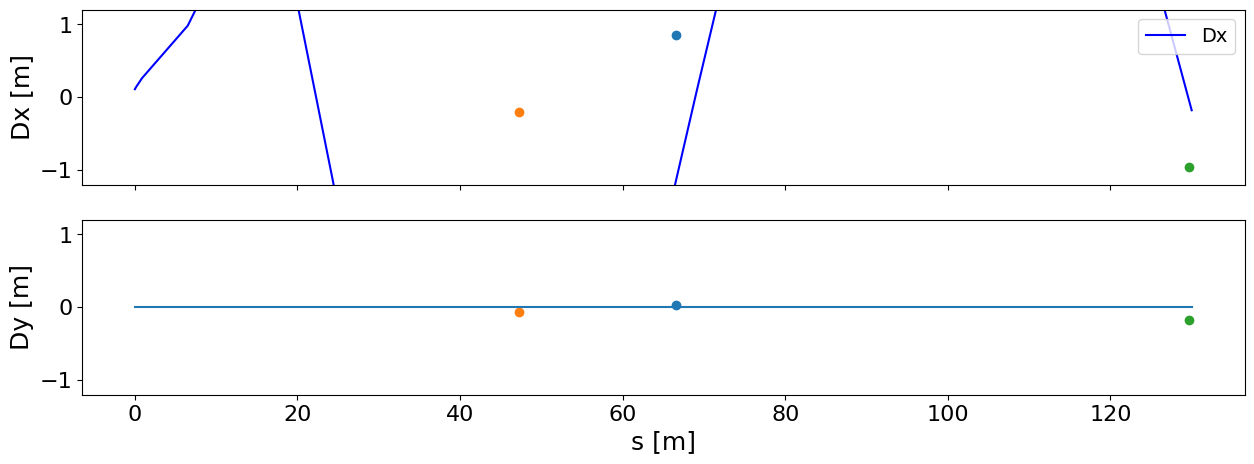

In [64]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(15,5))
ax[0].plot(twiss_scattered.s, twiss_scattered.dx, label='Dx', c="b")


ax[0].scatter(twiss_scattered.loc['t08.btv035'].s, 0.851)
ax[0].scatter(twiss_scattered.loc['t08.btv020'].s, -0.197)
ax[0].scatter(twiss_scattered.loc['t08.xwcm103'].s, -0.963)

ax[1].plot(twiss_scattered.s, twiss_scattered.dy, label='Dy')
ax[1].scatter(twiss_scattered.loc['t08.btv035'].s, 0.035)
ax[1].scatter(twiss_scattered.loc['t08.btv020'].s, -0.061)
ax[1].scatter(twiss_scattered.loc['t08.xwcm103'].s, -0.169)

ax[0].legend(loc="upper right")

ax[0].set_ylabel("Dx [m]")
ax[1].set_ylabel("Dy [m]")
ax[1].set_xlabel("s [m]")
ax[0].set_ylim(-1.2,1.2)
ax[1].set_ylim(-1.2,1.2)

In [14]:
sigH = beam_size(twiss_scattered.loc['t08.xwcm103']['betx'], twiss_scattered.loc['t08.xwcm103']['dx'], twiss_scattered.loc['t08.xwcm103'].ex, sige, 1)
sigV = beam_size(twiss_scattered.loc['t08.xwcm103']['bety'], twiss_scattered.loc['t08.xwcm103']['dy'], twiss_scattered.loc['t08.xwcm103'].ey, sige, 1)

def fwhm_func(sigma):
        return abs(2 * np.sqrt(2 * np.log(2)) * sigma)

fwhmH = fwhm_func(sigH)
fwhmV = fwhm_func(sigV)

print(f"{fwhmH*1000:.2f} mm")
print(f"{fwhmV*1000:.2f} mm")

21.82 mm
68.01 mm


In [15]:
observation = "t08.btv096"
sigH = beam_size(twiss_scattered.loc[observation]['betx'], twiss_scattered.loc[observation]['dx'], twiss_scattered.loc[observation].ex, sige, 1)
sigV = beam_size(twiss_scattered.loc[observation]['bety'], twiss_scattered.loc[observation]['dy'], twiss_scattered.loc[observation].ey, sige, 1)

def fwhm_func(sigma):
        return abs(2 * np.sqrt(2 * np.log(2)) * sigma)

fwhmH = fwhm_func(sigH)
fwhmV = fwhm_func(sigV)

print(f"{fwhmH*1000:.2f} mm")
print(f"{fwhmV*1000:.2f} mm")

17.88 mm
60.78 mm


In [16]:
def gaussian_function(x, a, I, mu, sig):
    return a + I / np.sqrt(2 * np.pi * sig ** 2) * np.exp(-(x - mu) ** 2 / 2. / sig ** 2)

def do_gaussian_fit(x,y):
    mu = np.average(x, weights=np.abs(y - np.min(y)))
    sigma = np.sqrt(np.average(x**2, weights=np.abs(y - np.min(y))) - mu**2)
    p0 = [y.min(), (np.max(y) - np.min(y)) * np.sqrt(2 * np.pi * sigma**2), mu, sigma]
    popt, pcov = curve_fit(gaussian_function, x, y, p0=p0, maxfev=1000) # maxfev is the number of tries it does the fit
    return popt, pcov

def fwhm_func(sigma):
        return abs(2 * np.sqrt(2 * np.log(2)) * sigma)

NameError: name 'x' is not defined

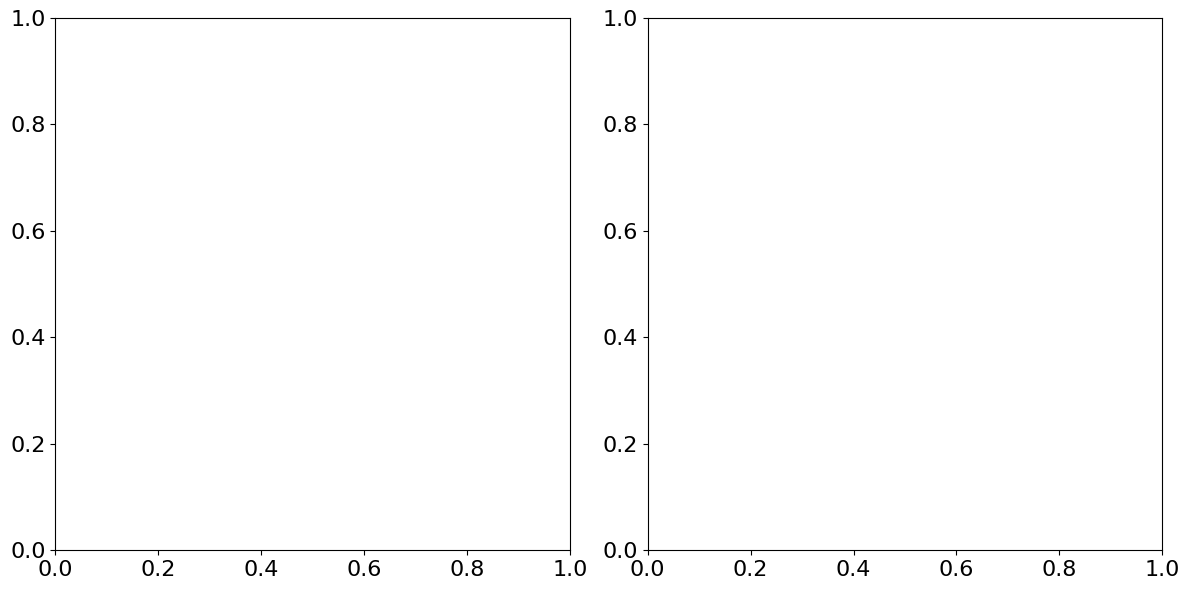

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal
from scipy.optimize import curve_fit

fig, ax = plt.subplots(1,2, figsize=(12, 6), tight_layout=True)

ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)

# MAD-X
observation = "t08.btv096"
# observation = "t08.xwcm103"
sigH = beam_size(twiss_scattered.loc[observation]['betx'], twiss_scattered.loc[observation]['dx'], twiss_scattered.loc[observation].ex, sige, 1)
sigV = beam_size(twiss_scattered.loc[observation]['bety'], twiss_scattered.loc[observation]['dy'], twiss_scattered.loc[observation].ey, sige, 1)
ax[0].plot(x, gaussian_function(x, 0, 1, 0, sigH*1000)/gaussian_function(x, 0, 1, 0, sigH*1000).max(), lw=4, ls="--", c="b", label=f"MAD-X MCS H FWHM = {fwhm_func(sigH)*1000:.1f} mm")
ax[1].plot(x, gaussian_function(x, 0, 1, 0, sigV*1000)/gaussian_function(x, 0, 1, 0, sigV*1000).max(), lw=4, ls="--", c="r", label=f"MAD-X MCS V FWHM = {fwhm_func(sigV)*1000:.1f} mm")

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

ax[0].set_ylabel("Intensity normalized [arb.]")
ax[1].set_ylabel("Intensity normalized [arb.]")

ax[0].set_xlabel("Distance [mm]")
ax[1].set_xlabel("Distance [mm]")

fig.suptitle(f"RP Run at 3 GeV/u: {observation} at ", fontsize=25)